# This one is to test if spark functionality works well

##  (1) Test Spark functionality

In [1]:
import pyspark
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.tree import DecisionTree

SparkContext is the main object in the Spark API.
Here is to test if the Spark jobs work properly

In [2]:
sc = pyspark.SparkContext()

In [3]:
# Check that Spark is working
largeRange = sc.parallelize(range(0,10000,2),5)
reduceTest = largeRange.reduce(lambda a,b: a+b)
filterReduceTest = largeRange.filter(lambda x:x%7 ==0).sum()
print('largeRange:',largeRange)
print('reduceTest:',reduceTest)
print('filterRduceTest:',filterReduceTest)

largeRange: PythonRDD[3] at RDD at PythonRDD.scala:48
reduceTest: 24995000
filterRduceTest: 3573570


In [4]:
# check loading data with sc.textFile
import os.path
baseDir = os.path.join('data\MNIST')
fileName = baseDir + '\Train-28x28_cntk_text.txt'

rawData = sc.textFile(fileName)
TrainNumber = rawData.count()
print(TrainNumber)

assert TrainNumber == 60000

60000


## (2) Check class testing library

### (2a) Compare with hash

#### NOTE: 
####        1). INSTALL test_helper. After install test_helper, find the local file of test_help in /../site-packages/.., copy all the content in test_helper.py to __init__.py. 2).Change the print xxxxx to print(xxxx) in the two files if you are running python 3


Test.assertEqualsHashed()： TypeError: Unicode-objects must be encoded before hashing

In [5]:
# Test Compare with hash
# Check our testing library/package
# This should print '1 test passed.' on two lines
from test_helper import Test
twelve = 12
Test.assertEquals(twelve, 12, 'twelve should equal 12')
#Test.assertEqualsHashed(twelve,'7b52009b64fd0a2a49e6d8a939753077792b0554','twelve, once hashed, should equal the hashed value of 12' )


1 test passed.


### (2b) Compare lists

In [6]:
# Test Compare lists 
# This should print '1 test paseed.'
unsortedList = [(5,'b'),(5,'a'),(4,'c'),(3,'a')]
Test.assertEquals(sorted(unsortedList),[(3,'a'),(4,'c'),(5,'a'),(5,'b')],
                 "unsortedList doesn't sort properly")

1 test passed.


## (3) Check plotting

### (3a) First plot

After executing the code cell below, you should see a plot with 50 blue circles. The circles should start at the bottom left and end at the top right

(<matplotlib.text.Text at 0x1b9b2a7f8d0>,
 <matplotlib.text.Text at 0x1b9b2ad8f98>)

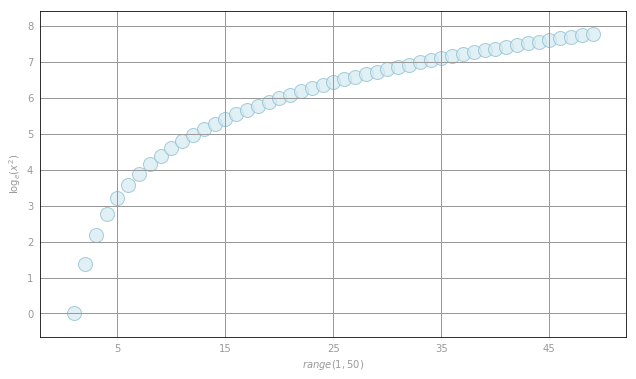

In [7]:
# Check matplotlib plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import log

# function for generating plot layout
def preparePlot(xticks, yticks, figsize=(10.5,6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999',labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks),(ax.get_yaxis(),yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, lineWidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False),['bottom','top','left','right'])
    return fig, ax

# generate layout and plot data
x = range(1,50)
y = [log(x1 ** 2) for x1 in x]
fig, ax = preparePlot(range(5,60,10),range(0,12,1))
plt.scatter(x,y,s=14**2, c='#d6ebf2', edgecolors='#8cbfd0',alpha=0.75)
ax.set_xlabel(r'$range(1, 50)$'), ax.set_ylabel(r'$\log_e(x^2)$')
